**Leveraging Machine Learning Techniques To Predict And Improve Student Retention And Drop Out**

**Installing necessary tools and libraries.**

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from pandas import crosstab
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


**Reading the dataset.**

In [2]:
#Reading the dataset
df=pd.read_csv('/content/education_data.csv')

**Analysing the data and doing data cleaning if needed.**

In [3]:
#Printing the first 5 rows
df.head()


,Marital status,Application mode,Application order,Course,Daytime evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
#printing the shape of the dataset
print(df.shape)

(4424, 37)


In [5]:
#Checking for nulls
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [6]:
#Checking whether the dataset has any missing values
if df.isnull().sum().sum() == 0:
    print("There are no null or missing values in the whole dataset.")
else:
    print("There are missing values in the dataset.")


There are no null or missing values in the whole dataset.


In [7]:
display(df.describe())

,Marital status,Application mode,Application order,Course,Daytime evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


**Printing the target.**

In [8]:
#printing target distribution
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


 **Performing Exploratory Data Analysis**

**Distribution of Target**

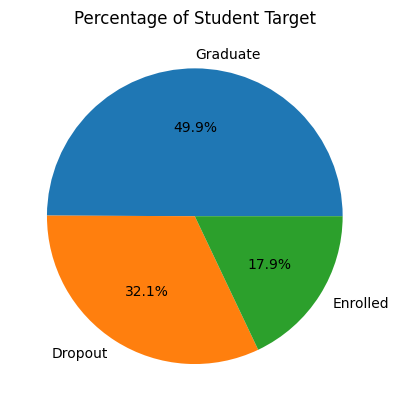

In [9]:
#visualising the target variable
df_target = df['Target'].value_counts()

plt.pie(df_target, labels=df_target.index, autopct='%1.1f%%')
plt.title('Percentage of Student Target')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


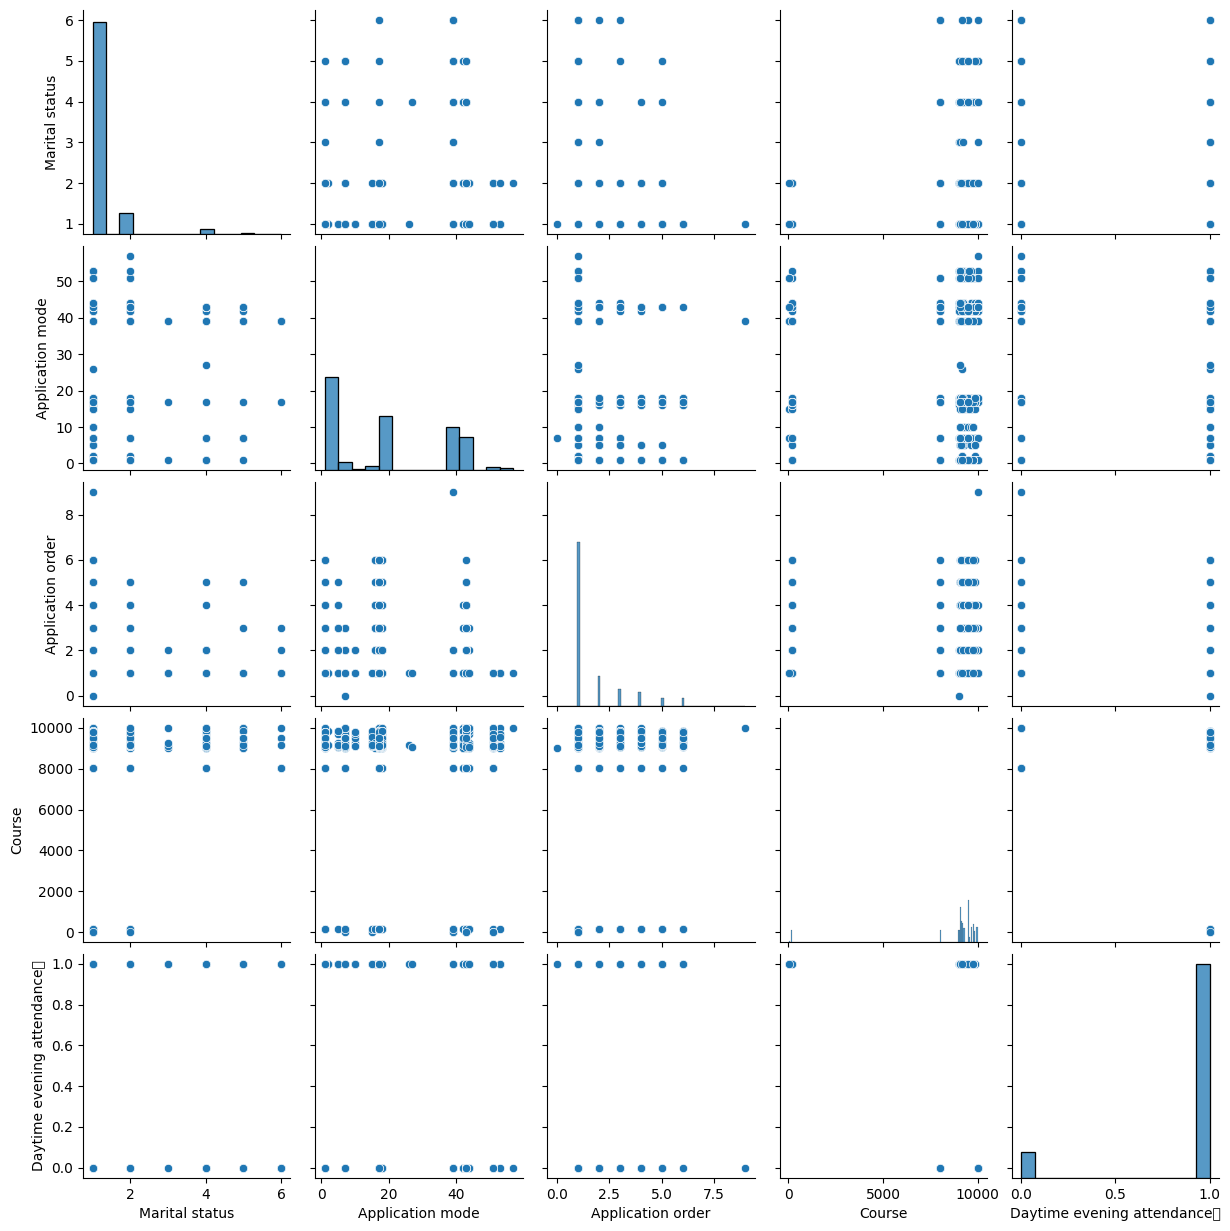

In [10]:
# Plotting pair plots for a subset of numeric features
numeric_columns = df.select_dtypes(include=['number']).columns
subset_columns = numeric_columns[:5]  # Adjust the number of features to plot based on the dataset size

sns.pairplot(df[subset_columns])
plt.show()

**Data  Preprocessing**

In [11]:
#label encoding the target
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [12]:
df['Target'].value_counts()

,count
Target,
2,2209
0,1421
1,794


**Dimension Reduction**

**Checking for Correlation among the features.**

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


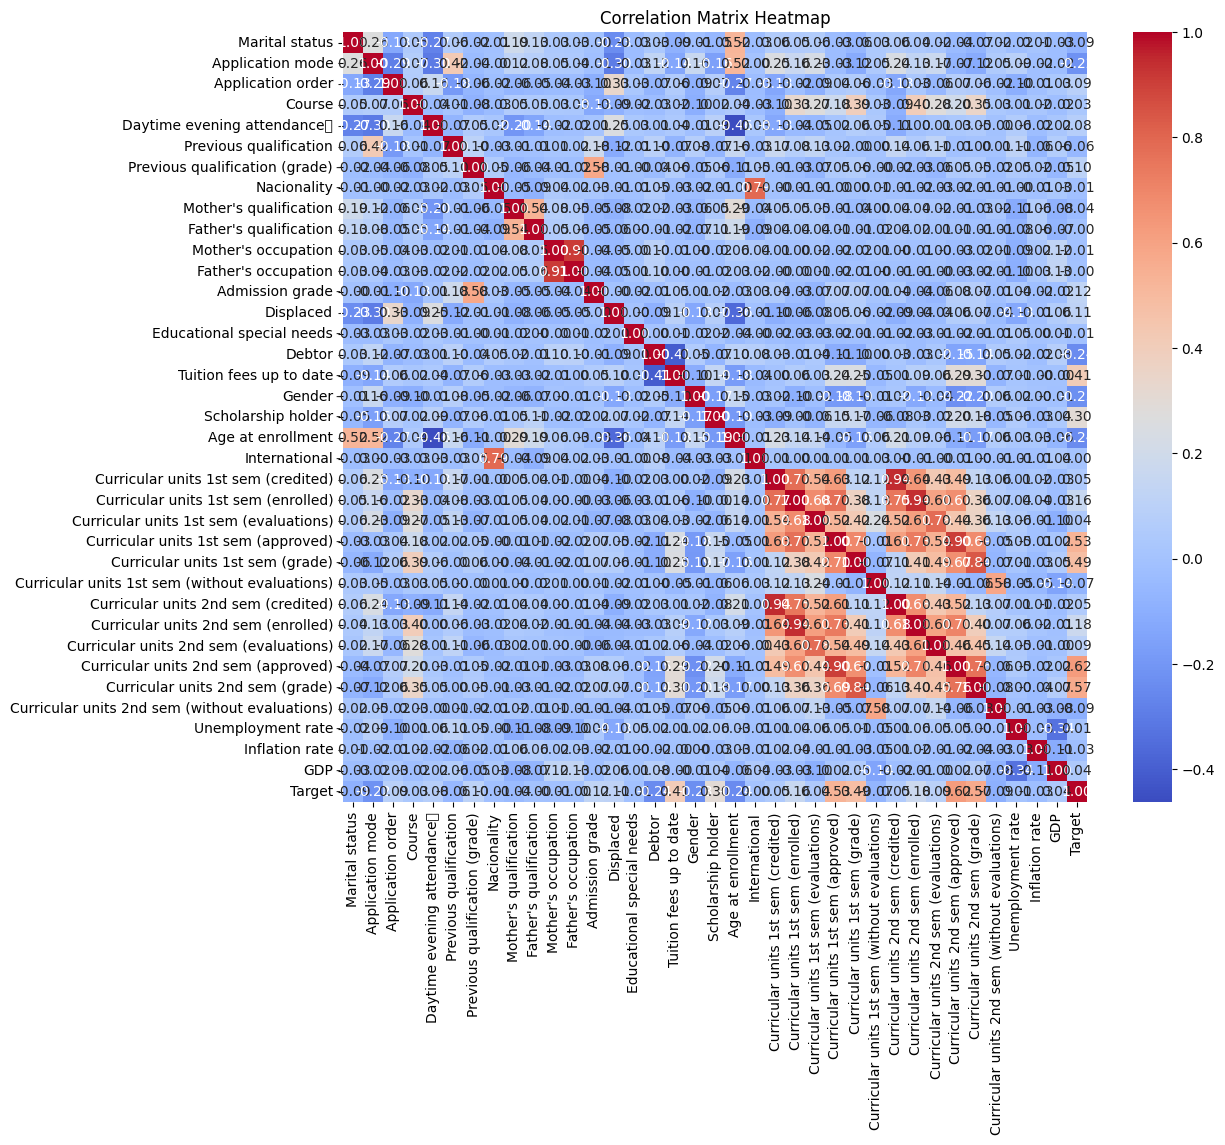

In [13]:
# Compute the correlation matrix
corr_matrix_df = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:

# Initial list of columns
initial_columns = set(df.columns)

# Identifying and dropping columns with more than 50% missing values
threshold = len(df) * 0.5
before_dropna_columns = set(df.columns)
df.dropna(thresh=threshold, axis=1, inplace=True)
dropped_na = before_dropna_columns - set(df.columns)

# Identifying and dropping columns with low variance
selector = VarianceThreshold(threshold=0.1)
selector.fit(df.select_dtypes(include=[np.number]))  # Apply only to numerical columns
low_variance_columns = [column for column in df.select_dtypes(include=[np.number]).columns if column not in df.columns[selector.get_support()]]
df.drop(low_variance_columns, axis=1, inplace=True)

# Identifying and dropping correlated columns
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(drop_corr, axis=1, inplace=True)

# Identifying and dropping columns with only one unique value
before_drop_unique_columns = set(df.columns)
for column in df.columns:
    if df[column].nunique() == 1:
        df.drop(column, axis=1, inplace=True)
dropped_one_unique_value = before_drop_unique_columns - set(df.columns)

#Identifying and dropping columns with unique values for each row
before_drop_all_unique_columns = set(df.columns)
for column in df.columns:
    if df[column].nunique() == len(df):
        df.drop(column, axis=1, inplace=True)
dropped_unique_values = before_drop_all_unique_columns - set(df.columns)

print(df.head())

# Displaying the dropped columns
print("Dropped due to >50% missing values:", dropped_na)
print("Dropped due to low variance:", low_variance_columns)
print("Dropped due to high correlation:", drop_corr)
print("Dropped due to only one unique value:", dropped_one_unique_value)
print("Dropped due to unique values for each row:", dropped_unique_values)


   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Previous qualification  Previous qualification (grade)  Nacionality  \
0                       1                           122.0            1   
1                       1                           160.0            1   
2                       1                           122.0            1   
3                       1                           122.0            1   
4                       1                           100.0            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      19                      12                    5  ...   


In [15]:
df.describe()

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [16]:

# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Create an upper triangle matrix to avoid redundancy
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with a correlation higher than the threshold (e.g., 0.95)
threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the highly correlated columns
df.drop(to_drop, axis=1, inplace=True)

# Display the remaining columns
print("Remaining columns after dropping highly correlated ones:")
print(df.columns)


Remaining columns after dropping highly correlated ones:
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular u

In [17]:
df.describe()

,Marital status,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


**Data Standardising**

In [18]:

X = df.drop('Target', axis=1)
y = df['Target']

**Performing PCA**

In [19]:

# Standardizing the data (important for PCA)
X_standardized = (X - X.mean()) / X.std()

# Fit PCA model
pca = PCA()
pca.fit(X_standardized)

# Get the loadings matrix
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)

print(loadings)


                                                     PC1       PC2       PC3  \
Marital status                                  0.014349  0.239621  0.103177   
Application mode                                0.056473  0.362955 -0.013292   
Application order                              -0.013648 -0.229751  0.045239   
Course                                          0.131779 -0.048685  0.187542   
Previous qualification                          0.044451  0.181491 -0.092104   
Previous qualification (grade)                 -0.000491 -0.066359 -0.169893   
Nacionality                                    -0.008029 -0.002946 -0.006607   
Mother's qualification                          0.016383  0.148752  0.241231   
Father's qualification                          0.017281  0.105075  0.232449   
Mother's occupation                            -0.003859  0.080973  0.535639   
Father's occupation                            -0.006078  0.068267  0.539186   
Admission grade                         

In [20]:
cumulative_contributions = loadings.abs().sum(axis=1).sort_values(ascending=False)

#finding top features
top_features = cumulative_contributions.index[:]  # Example: top 10 features

print("Top contributing features across all principal components:")
print(cumulative_contributions)
print("\nSelected top features:")
print(top_features)

Top contributing features across all principal components:
Course                                            4.413689
Curricular units 1st sem (grade)                  4.291013
Previous qualification                            4.257525
Curricular units 2nd sem (grade)                  4.241542
Previous qualification (grade)                    4.118051
Curricular units 2nd sem (evaluations)            4.094714
Marital status                                    4.086330
Curricular units 2nd sem (without evaluations)    4.035066
GDP                                               4.030827
Unemployment rate                                 4.013443
Curricular units 1st sem (evaluations)            4.000286
Curricular units 2nd sem (approved)               3.909482
Mother's qualification                            3.879156
Scholarship holder                                3.870252
Displaced                                         3.866408
Father's qualification                            3.8607

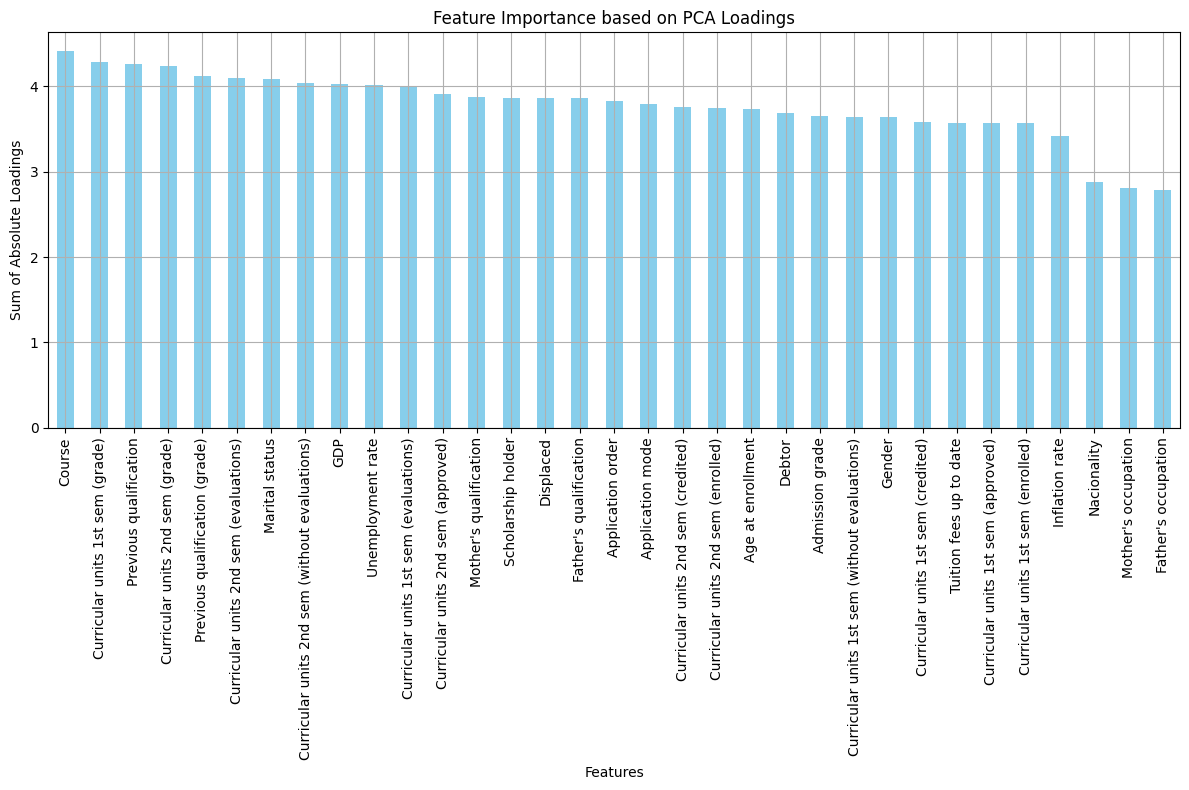

In [21]:

# Step 4: Plot the loadings

loadings_abs_sum = loadings.abs().sum(axis=1)

# Plotting
plt.figure(figsize=(12, 8))
loadings_abs_sum.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance based on PCA Loadings')
plt.xlabel('Features')
plt.ylabel('Sum of Absolute Loadings')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Set threshold for low contribution
threshold = 3

# Identifing features with low contribution
low_contribution_features = cumulative_contributions[cumulative_contributions.abs() < threshold].index.tolist()


print("Features with low contribution : ", low_contribution_features)


high_contribution_features = cumulative_contributions[cumulative_contributions.abs() >= threshold].index.tolist()

# Print high contribution features
print("Features to retain for further analysis: ", high_contribution_features)


Features with low contribution :  ['Nacionality', "Mother's occupation", "Father's occupation"]
Features to retain for further analysis:  ['Course', 'Curricular units 1st sem (grade)', 'Previous qualification', 'Curricular units 2nd sem (grade)', 'Previous qualification (grade)', 'Curricular units 2nd sem (evaluations)', 'Marital status', 'Curricular units 2nd sem (without evaluations)', 'GDP', 'Unemployment rate', 'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (approved)', "Mother's qualification", 'Scholarship holder', 'Displaced', "Father's qualification", 'Application order', 'Application mode', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Age at enrollment', 'Debtor', 'Admission grade', 'Curricular units 1st sem (without evaluations)', 'Gender', 'Curricular units 1st sem (credited)', 'Tuition fees up to date', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (enrolled)', 'Inflation rate']


In [23]:
print(X)

X_new = X[high_contribution_features]

# printing the new DataFrame with retained features
print(X_new.info())


      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Previous qualification  Previous qualification (grade)  Nacionality  \
0                          1                           122.0            1   
1                

In [24]:
y.head()

,Target
0,0
1,2
2,0
3,2
4,2


**Applying SMOTE Technique and Resampling**

In [25]:
# Balance the data using SMOTE technique and rsampling


sm = SMOTE(random_state = 42)
X_sm, y_sm = sm.fit_resample(X, y)

**Splitting into Train and Test data**

In [26]:
#Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42) #Getting train and test data
print(y_train)
print(y_test)

2239    1
6490    1
5995    1
2855    0
6084    1
       ..
3772    2
5191    0
5226    1
5390    1
860     0
Name: Target, Length: 4970, dtype: int64
4552    0
4443    0
3910    1
4728    0
4490    0
       ..
4169    0
307     0
3535    0
2669    0
5143    0
Name: Target, Length: 1657, dtype: int64


**Model 1 :Gradient Boosting Model**

In [27]:

# Defining the model
gbm = GradientBoostingClassifier(random_state=42)

# Performing Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_acc_gbm = cross_val_score(gbm, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_auc_gbm = cross_val_score(gbm, X_train, y_train, cv=cv, scoring='roc_auc_ovr')

# Fitting the model
gbm.fit(X_train, y_train)

# Predicting on the test set
y_pred_gbm = gbm.predict(X_test)

# Calculating the evaluation metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm, average=None)
report = classification_report(y_test, y_pred_gbm)

# Calculating AUC Score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = gbm.predict_proba(X_test)
roc_auc_gbm = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

# Printing results
print("Cross-Validation Accuracy: ", cross_val_acc_gbm.mean())
print("Cross-Validation AUC: ", cross_val_auc_gbm.mean())
print("Test Set Accuracy: ", accuracy_gbm)
print("F1-Score: ", f1_gbm)
print(classification_report(y_test, y_pred_gbm))
print("AUC Score: ", roc_auc_gbm)


Cross-Validation Accuracy:  0.8070422535211268
Cross-Validation AUC:  0.9314672453769599
Test Set Accuracy:  0.7851538925769463
F1-Score:  [0.79809524 0.73636364 0.81958763]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       566
           1       0.72      0.75      0.74       538
           2       0.78      0.86      0.82       553

    accuracy                           0.79      1657
   macro avg       0.79      0.79      0.78      1657
weighted avg       0.79      0.79      0.79      1657

AUC Score:  0.9191317821554407


**Model 2 : Random Forest Classifier Model**

In [28]:

# Defining the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Performing Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_acc_rf = cross_val_score(rf, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_auc_rf = cross_val_score(rf, X_train, y_train, cv=cv, scoring='roc_auc_ovr')

# Fitting the model
rf.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf.predict(X_test)

# Calculating the evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average=None)
report = classification_report(y_test, y_pred_rf)

# Calculating AUC Score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = rf.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

# Printing results
print("Cross-Validation Accuracy: ", cross_val_acc_rf.mean())
print("Cross-Validation AUC: ", cross_val_auc_rf.mean())
print("Test Set Accuracy: ", accuracy_rf)
print("F1-Score: ", f1_rf)
print(classification_report(y_test, y_pred_rf))
print("AUC Score: ", roc_auc_rf)


Cross-Validation Accuracy:  0.8245472837022133
Cross-Validation AUC:  0.9435344050901678
Test Set Accuracy:  0.824381412190706
F1-Score:  [0.84389782 0.79927007 0.83031869]
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       566
           1       0.78      0.81      0.80       538
           2       0.79      0.87      0.83       553

    accuracy                           0.82      1657
   macro avg       0.83      0.82      0.82      1657
weighted avg       0.83      0.82      0.82      1657

AUC Score:  0.9427512129302599


**Model 3 : Ada Boost Classifier Model**

In [29]:

# Defining the AdaBoost model
ab = AdaBoostClassifier(random_state=42)

# Performing Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_acc_ada = cross_val_score(ab, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_auc_ada = cross_val_score(ab, X_train, y_train, cv=cv, scoring='roc_auc_ovr')

# Fitting the model
ab.fit(X_train, y_train)

# Predicting on the test set
y_pred_ab = ab.predict(X_test)

# Calculating the evaluation metrics
accuracy_ada = accuracy_score(y_test, y_pred_ab)
f1_ada = f1_score(y_test, y_pred_ab, average=None)
report = classification_report(y_test, y_pred_ab)

# Calculating AUC Score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = ab.predict_proba(X_test)
roc_auc_ada = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

# Printing results
print("Cross-Validation Accuracy: ", cross_val_acc_ada.mean())
print("Cross-Validation AUC: ", cross_val_auc_ada.mean())
print("Test Set Accuracy: ", accuracy_ada)
print("F1-Score: ", f1_ada)
print(classification_report(y_test, y_pred_ab))
print("AUC Score: ", roc_auc_ada)


Cross-Validation Accuracy:  0.7619718309859154
Cross-Validation AUC:  0.8726508567060025
Test Set Accuracy:  0.7495473747736874
F1-Score:  [0.74903475 0.6972639  0.80174672]
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       566
           1       0.66      0.73      0.70       538
           2       0.78      0.83      0.80       553

    accuracy                           0.75      1657
   macro avg       0.75      0.75      0.75      1657
weighted avg       0.76      0.75      0.75      1657

AUC Score:  0.8520023186963391


**Model 4 : LightGBM Classifier Model**

In [30]:
import lightgbm as lgb


# Defining the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Performing Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_acc_lgb = cross_val_score(lgb_model, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_auc_lgb = cross_val_score(lgb_model, X_train, y_train, cv=cv, scoring='roc_auc_ovr')

# Fitting the model
lgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Calculating the evaluation metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb, average=None)
report = classification_report(y_test, y_pred_lgb)

# Calculating the AUC Score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = lgb_model.predict_proba(X_test)
roc_auc_lgb = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

# Printing the results
print("Cross-Validation Accuracy: ", cross_val_acc_lgb.mean())
print("Cross-Validation AUC: ", cross_val_auc_lgb.mean())
print("Test Set Accuracy: ", accuracy_lgb)
print("F1-Score: ", f1_lgb)
print(classification_report(y_test, y_pred_lgb))
print("AUC Score: ", roc_auc_lgb)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2344
[LightGBM] [Info] Number of data points in the train set: 3976, number of used features: 33
[LightGBM] [Info] Start training from score -1.106440
[LightGBM] [Info] Start training from score -1.090596
[LightGBM] [Info] Start training from score -1.098864
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2340
[LightGBM] [Info] Number of data points in the train set: 3976, nu

**LightGBM Classifier Model-Hypertuned**

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Define the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, 5, 10, 15],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of different combinations to try
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fitting the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Getting the best parameters and the best score
best_params = random_search.best_params_
best_score_lgb = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score_lgb)

# Training the best model with the best parameters
best_lgb_model = random_search.best_estimator_

# Predicting on the test set with the best model
y_pred_lgb_best = best_lgb_model.predict(X_test)

# Calculating the evaluation metrics
accuracy_lgb_hypertuned = accuracy_score(y_test, y_pred_lgb_best)
f1_hypertuned = f1_score(y_test, y_pred_lgb_best, average=None)
report = classification_report(y_test, y_pred_lgb_best)

# Calculating AUC Score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = best_lgb_model.predict_proba(X_test)
roc_auc_hypertuned = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

# Printing results
print("Test Set Accuracy: ", accuracy_lgb_hypertuned)
print("F1-Score: ", f1_hypertuned)
print(classification_report(y_test, y_pred_lgb_best))
print("AUC Score: ", roc_auc_hypertuned)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2366
[LightGBM] [Info] Number of data points in the train set: 4970, number of used features: 33
[LightGBM] [Info] Start training from score -1.106896
[LightGBM] [Info] Start training from score -1.089998
[LightGBM] [Info] Start training from score -1.099015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

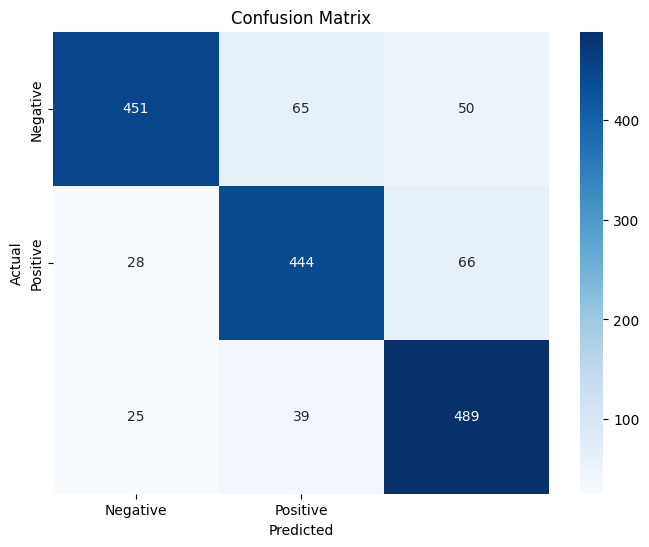

In [33]:
from sklearn.metrics import confusion_matrix
 # creating a confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb_best)
# Define the labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Model 5: Decision Tree Model**

In [34]:


# Defining the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_acc_dt = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_auc_dt = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='roc_auc_ovr')

# Fit the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average=None)
report = classification_report(y_test, y_pred_dt)

# Calculate AUC Score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = dt_model.predict_proba(X_test)
roc_auc_dt = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

# Print results
print("Cross-Validation Accuracy: ", cross_val_acc_dt.mean())
print("Cross-Validation AUC: ", cross_val_auc_dt.mean())
print("Test Set Accuracy: ", accuracy_dt)
print("F1-Score: ", f1_dt)
print(classification_report(y_test, y_pred_dt))
print("AUC Score: ", roc_auc_dt)


Cross-Validation Accuracy:  0.719718309859155
Cross-Validation AUC:  0.7897782486559448
Test Set Accuracy:  0.7296318648159325
F1-Score:  [0.75298439 0.68581688 0.75067507]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       566
           1       0.66      0.71      0.69       538
           2       0.75      0.75      0.75       553

    accuracy                           0.73      1657
   macro avg       0.73      0.73      0.73      1657
weighted avg       0.73      0.73      0.73      1657

AUC Score:  0.797304390551519


In [35]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.5 MB/s eta 0:00:00


**Model 6 : Cat Boost Classifier Model**

In [36]:
import catboost
from catboost import CatBoostClassifier


# Defining the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, silent=True)

# Performing Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_acc_cb = cross_val_score(catboost_model, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_auc_cb = cross_val_score(catboost_model, X_train, y_train, cv=cv, scoring='roc_auc_ovr')

# Fitting the model
catboost_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Calculating the evaluation metrics
accuracy_cb = accuracy_score(y_test, y_pred_catboost)
f1_cb = f1_score(y_test, y_pred_catboost, average=None)
report = classification_report(y_test, y_pred_catboost)

# Calculating AUC Score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = catboost_model.predict_proba(X_test)
roc_auc_cb = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

# Printing results
print("Cross-Validation Accuracy: ", cross_val_acc_cb.mean())
print("Cross-Validation AUC: ", cross_val_auc_cb.mean())
print("Test Set Accuracy: ", accuracy_cb)
print("F1-Score: ", f1_cb)
print(classification_report(y_test, y_pred_catboost))
print("AUC Score: ", roc_auc_cb)


Cross-Validation Accuracy:  0.8432595573440645
Cross-Validation AUC:  0.9492127991696988
Test Set Accuracy:  0.8207604103802052
F1-Score:  [0.83870968 0.79162875 0.83204134]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       566
           1       0.78      0.81      0.79       538
           2       0.79      0.87      0.83       553

    accuracy                           0.82      1657
   macro avg       0.83      0.82      0.82      1657
weighted avg       0.83      0.82      0.82      1657

AUC Score:  0.9445024512408192


In [37]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.4 MB/s eta 0:00:00


**Cat Boost Classifier Model -Hypertuned**

In [38]:
import optuna

# Defining the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 0.1, 1.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_state': 42,
        'silent': True
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, verbose=0)  # Disable verbose output for optimization
    preds = model.predict(X_test)
    accuracy_cb_hypertuned = accuracy_score(y_test, preds)
    return accuracy_cb_hypertuned

# Creating the Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)  # Number of trials to run

# Printing the best parameters and best score
print("Best Parameters:", study.best_params)
print("Best Score:", study.best_value)

# Training the best model with the best parameters
best_params = study.best_params
best_model = CatBoostClassifier(**best_params, random_state=42, silent=True)
best_model.fit(X_train, y_train)

# Performing Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_acc_cb_ht = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')
cross_val_auc_cb_ht = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='roc_auc_ovr')
# Making predictions on the test set with the best model
y_pred_catboost = best_model.predict(X_test)

# Calculating the evaluation metrics
accuracy_cb_hypertuned = accuracy_score(y_test, y_pred_catboost)
f1_cb_ht = f1_score(y_test, y_pred_catboost, average=None)
report = classification_report(y_test, y_pred_catboost)

# Calculate AUC Score
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = best_model.predict_proba(X_test)
roc_auc_cb_ht = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

# Printing results
print("Test Set Accuracy: ", accuracy_cb_hypertuned)
print("F1-Score: ", f1_cb_ht)
print(classification_report(y_test, y_pred_catboost))
print("AUC Score: ", roc_auc_cb_ht)


[I 2024-08-01 00:03:24,043] A new study created in memory with name: no-name-f7602501-9641-40f9-914a-af2aabe96fc9
[I 2024-08-01 00:03:25,156] Trial 0 finished with value: 0.7754978877489439 and parameters: {'n_estimators': 143, 'max_depth': 3, 'learning_rate': 0.14308608854627364, 'l2_leaf_reg': 5.562103352288688, 'random_strength': 0.4197440565705979, 'bagging_temperature': 0.3880294172746286, 'border_count': 221}. Best is trial 0 with value: 0.7754978877489439.
[I 2024-08-01 00:03:34,046] Trial 1 finished with value: 0.8092939046469523 and parameters: {'n_estimators': 463, 'max_depth': 5, 'learning_rate': 0.06936702257909304, 'l2_leaf_reg': 1.1686556553896992, 'random_strength': 0.948147984315231, 'bagging_temperature': 0.36222858775403066, 'border_count': 242}. Best is trial 1 with value: 0.8092939046469523.
[I 2024-08-01 00:03:37,459] Trial 2 finished with value: 0.7936028968014484 and parameters: {'n_estimators': 391, 'max_depth': 3, 'learning_rate': 0.11774084286338495, 'l2_leaf_

Best Parameters: {'n_estimators': 262, 'max_depth': 9, 'learning_rate': 0.2862188530982831, 'l2_leaf_reg': 1.5796472965788984, 'random_strength': 0.15175357737561174, 'bagging_temperature': 0.558721323902585, 'border_count': 123}
Best Score: 0.8370549185274593
Test Set Accuracy:  0.8370549185274593
F1-Score:  [0.85174693 0.81785064 0.84183232]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       566
           1       0.80      0.83      0.82       538
           2       0.81      0.88      0.84       553

    accuracy                           0.84      1657
   macro avg       0.84      0.84      0.84      1657
weighted avg       0.84      0.84      0.84      1657

AUC Score:  0.9494349079732846


In [39]:
print("Cross-Validation Accuracy: ", cross_val_acc_cb_ht.mean())
print("Cross-Validation AUC: ", cross_val_auc_cb_ht.mean())

Cross-Validation Accuracy:  0.8448692152917504
Cross-Validation AUC:  0.9508195106033099


In [40]:

import pandas as pd

# Defining test accuracy scores
accuracy_scores = {
    'DecisionTree': accuracy_dt * 100,
    'GBM': accuracy_gbm * 100,
    'RandomForest': accuracy_rf * 100,
    'LightGBM-Hypertuned': accuracy_lgb_hypertuned * 100,
    'CatBoost-Hypertuned': accuracy_cb_hypertuned* 100,
    'AdaBoost': accuracy_ada* 100,

}


**Visualising test accuracy of each model**

In [41]:
# Creating DataFrames
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Classifiers', 'Accuracy'])

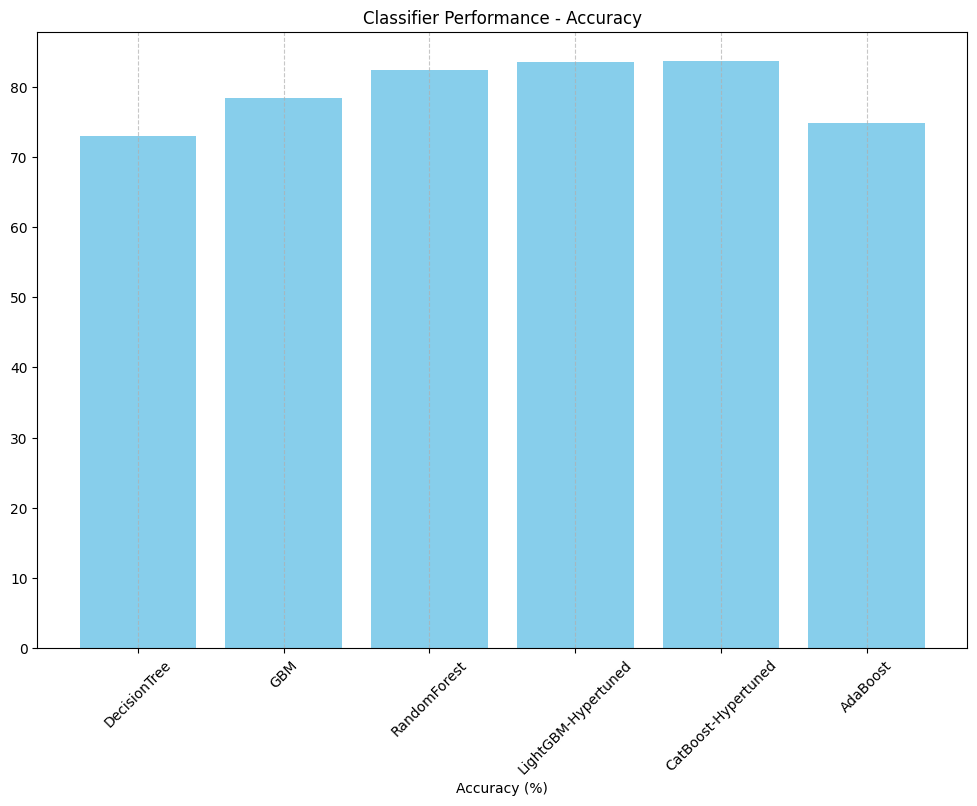

In [42]:
# Creating a bar plot for accuracy scores
plt.figure(figsize=(12, 8))
plt.bar(accuracy_df['Classifiers'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.title('Classifier Performance - Accuracy')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Feature Importance For Predicting Dropouts**

In [47]:
pip install shap


In [69]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the model
results = permutation_importance(best_lgb_model, X_sm, y_sm, scoring='accuracy')


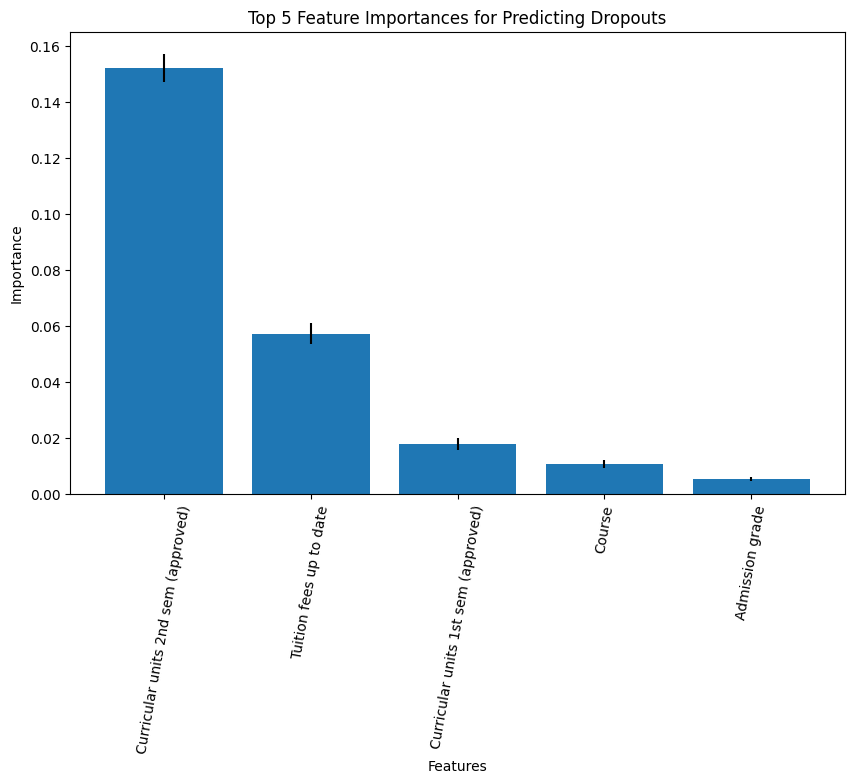

In [76]:
# Extracting the mean and standard deviation of importances
importances_mean = results['importances_mean']
importances_std = results['importances_std']
features = X_sm.columns

# Getting the indices of the top 5 features
top_indices = np.argsort(importances_mean)[::-1][:5]

# Plotting the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_indices)), importances_mean[top_indices], yerr=importances_std[top_indices], align="center")
plt.xticks(range(len(top_indices)), features[top_indices], rotation=80)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances for Predicting Dropouts')
plt.show()

